<a href="https://colab.research.google.com/github/Yulia-Kalenova/Pet-project/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%AF%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Анализ яндекс метрики сайта superwebsite.ru*

Есть данные с сайта  агрегатор (витрина) характеристик товаров и различных товарных категорий. Сайт создан для удобства изучения и сравнения характеристик разных товаров, представленных в интернет-магазинах, помогает покупателю определиться с выбором перед покупкой.<br>

Данные представлены  за период с 2021-02-01 по 2023-04-30. <br>

Результаты анализа будут использованы для размещения рекламы на сайте. Данные могут помочь определить на каком из разделов сайтов программистам необходимо больше проработать рекламные блоки.

*название сайта было измененно.

**Цель проекта**: провести анализ, дать рекомендации по размещению рекламы на сайте.

**Задачи проекта**: <br>
1) Необходимо определить, на какой из разделов сайтов заходит больше всего пользователей: /category/, /product/, /blog/; численное количество, процентное соотношение, сделать диаграммой, добавить условие «переходы с мобильных устройств» - столбец Мобильность, условие по полу муж/жен <br>
(Анализ таблицы "Страницы входа"). <br>
2) Необходимо определить на каком из разделов больше всего задерживается пользователь по времени <br>
3) Выявить на каких устройствах чаще всего стоит блокировка рекламы
(Анализ таблицы "Устройства")

In [1]:
#Загружаем файл "Источники"
from google.colab import files
uploaded = files.upload()

Saving Источники.xlsx to Источники.xlsx


In [2]:
#Загружаем файл "Страницы_входа"
from google.colab import files
uploaded = files.upload()

Saving Страницы_входа.xlsx to Страницы_входа.xlsx


In [3]:
#Загружаем файл "Устройства"
from google.colab import files
uploaded = files.upload()

Saving Устройства.xlsx to Устройства.xlsx


In [4]:
#Загружаем библиотеки
import pandas as pd
import numpy as np
from datetime import time
from datetime import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Открываем и сохраняем файл в переменную
df = pd.read_excel(open("Источники.xlsx", 'rb'))

In [6]:
df_dev = pd.read_excel(open("Устройства.xlsx", 'rb'))

In [7]:
df_page = pd.read_excel(open("Страницы_входа.xlsx", 'rb'))

In [8]:
#Знакомимся с данными таблицы "Источники"
df.head(10)

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
0,Итого и средние,NaN,1426538,1248583,0.237855,1.458533,00:01:02,0.663875,0.336125,0.604366,0.106412
1,Внутренние переходы,Не определено,5484,5219,0.243618,1.838074,00:01:08,0.549410,0.450590,0.819840,0.098750
2,Не определено,Не определено,360,337,0.752778,1.552778,00:00:49,0.794118,0.205882,0.530556,0.333333
3,Переходы из мессенджеров,Telegram,55,35,0.145455,2.690909,00:03:00,0.742857,0.257143,0.890909,0.031250
4,Переходы из поисковых систем,Яндекс,1274449,1106159,0.240500,1.426075,00:01:00,0.669129,0.330871,0.590250,0.105014
5,Переходы из поисковых систем,Google,37420,34853,0.283618,1.406440,00:00:53,0.681943,0.318057,0.671085,0.126924
6,Переходы из поисковых систем,Mail.ru,4280,4141,0.132944,1.443458,00:00:57,0.555105,0.444895,0.361449,0.205653
7,Переходы из поисковых систем,Bing,1964,1962,0.028513,1.831976,00:01:38,0.542345,0.457655,0.928208,0.231579
8,Переходы из поисковых систем,Rambler,1923,1620,0.259490,1.318253,00:00:56,0.718107,0.281893,0.158086,0.148936
9,Переходы из поисковых систем,DuckDuckGo,594,551,0.345118,1.319865,00:00:51,0.833935,0.166065,0.523569,0.223301


<b> Описание данных: </b> <br>
"Источник трафика" - показывает откуда пользователь перешел на сайт;  <br>
"Источник трафика (детально)" - с какого сайта пользователь перешел на сайт; <br>
"Визиты" - показывает совокупность cобытий, совершенных пользователями на сайте; <br>
"Посетители" - показывает количество уникальных посетителей за отчётный период; <br>
"Отказы" - доля посетителей сайта, кто проводит на сайте меньше 15 секунд, не идет дальше одной страницы и не совершает никаких действий; <br>
"Глубина просмотра" - сколько страниц сайта пользователь в среднем просматривает за один визит; <br>
"Время на сайте" - средняя продолжительность визита пользователя; <br>
"Доля мужчин" - доля мужчин среди посетителей сайта; <br>
"Доля женщин" - доля женщин среди посетителей сайта; <br>
"Мобильность" - какой процент пользователей просматривали контент с мобильных устройств или планшетов; <br>
"Блокировка рекламы" - программная возможность блокировки онлайн-рекламы в браузере; <br>

In [9]:
#смотрим детальную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Источник трафика             234 non-null    object 
 1   Источник трафика (детально)  233 non-null    object 
 2   Визиты                       234 non-null    int64  
 3   Посетители                   234 non-null    int64  
 4   Отказы                       234 non-null    float64
 5   Глубина просмотра            234 non-null    float64
 6   Время на сайте               234 non-null    object 
 7   Доля мужчин                  234 non-null    float64
 8   Доля женщин                  234 non-null    float64
 9   Мобильность                  234 non-null    float64
 10  Блокировка рекламы           234 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.2+ KB


Видим, что таблица состоит из 234 строк и 11 столбцов. Пропусков не наблюдается. В типах данных - есть несоответствие только в столбце "Время на сайте" - тип строковый, необходимо будет исправить на время.

In [10]:
#Знакомимся с данными таблицы "Страницы_входа"
df_page.head(10)

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
0,Итого и средние,NaN,483402,449169,0.184377,1.796379,00:01:16,0.644289,0.355711,0.707740
1,https://superwebsite.ru/blog,https://superwebsite.ru/blog,102,94,0.215686,2.088235,00:02:23,0.590909,0.409091,0.617647
2,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,1048,952,0.083015,1.330153,00:01:01,0.910926,0.089074,0.728053
3,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,941,880,0.083953,1.356004,00:00:49,0.931133,0.068867,0.883103
4,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,782,684,0.057545,1.168798,00:01:05,0.522951,0.477049,0.750639
5,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,670,631,0.102985,1.346269,00:01:13,0.704782,0.295218,0.826866
6,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,572,520,0.031469,1.356643,00:00:50,0.431151,0.568849,0.676573
7,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,527,500,0.227704,1.125237,00:00:31,0.267281,0.732719,0.686907
8,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,452,413,0.108407,1.172566,00:00:38,0.706422,0.293578,0.823009
9,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,415,391,0.098795,1.173494,00:01:08,0.463190,0.536810,0.819277


Описание данных:<br>
"Страница входа, ур. 2" - раздел сайта, к которой относится страница входа  <br>
"Страница входа" - страница, на которую попадает посетитель в первую очередь из источника трафика.

Остальные параметры такие же как в таблице "Источники".

In [11]:
#смотрим детальную информацию
df_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12837 entries, 0 to 12836
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Страница входа, ур. 2  12837 non-null  object 
 1   Страница входа         12836 non-null  object 
 2   Визиты                 12837 non-null  int64  
 3   Посетители             12837 non-null  int64  
 4   Отказы                 12837 non-null  float64
 5   Глубина просмотра      12837 non-null  float64
 6   Время на сайте         12837 non-null  object 
 7   Доля мужчин            12837 non-null  float64
 8   Доля женщин            12837 non-null  float64
 9   Мобильность            12837 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1003.0+ KB


Таблица содержит 12837 строк, 10 столбцов. пропусков не наблюдается. <br>
Тип данных "Время на сайте" - строковый, необходимо будет исправить на временой.


In [12]:
#Знакомимся с данными таблицы "Устройства"
df_dev.head(10)

,"Страница входа, ур. 2",Тип устройства,Производитель устройства,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Блокировка рекламы
0,"Итого и средние, Отчет за период с 2021-02-01 ...",NaN,NaN,1414840,1239247,0.238316,1.452409,00:01:01,0.105280
1,https://superwebsite.ru/product/,ПК,Не определено,455714,384064,0.276816,1.198798,00:00:57,0.225879
2,https://superwebsite.ru/product/,Смартфоны,Xiaomi,155535,138216,0.250632,1.264828,00:00:50,0.071306
3,https://superwebsite.ru/product/,Смартфоны,Samsung,134537,120362,0.260085,1.222898,00:00:46,0.069544
4,https://superwebsite.ru/product/,Смартфоны,Apple,106390,98953,0.290958,1.162543,00:00:45,0.022162
5,https://superwebsite.ru/product/,Смартфоны,Huawei,85751,76302,0.238295,1.212091,00:00:45,0.063252
6,https://superwebsite.ru/category/,ПК,Не определено,85697,79849,0.222902,1.678997,00:01:21,0.196623
7,https://superwebsite.ru/category/,Смартфоны,Xiaomi,64024,60971,0.134075,2.576940,00:01:49,0.074625
8,https://superwebsite.ru/category/,Смартфоны,Samsung,49770,47020,0.164276,2.518967,00:01:38,0.066621
9,https://superwebsite.ru/category/,Смартфоны,Apple,33457,32150,0.195535,2.212452,00:01:15,0.019658


Описание данных:

"Страница входа, ур. 2" -  раздел сайта, к которой относится страница входа, <br>
"Тип устройства" - тип устройства, с которого заходит пользователь на сайт.
"Производитель устройства" - производитель, фирма устройства пользователя.

Остальные параметры такие же как в таблице "Источники".


In [13]:
#смотрим детальную информацию
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Страница входа, ур. 2     255 non-null    object 
 1   Тип устройства            254 non-null    object 
 2   Производитель устройства  254 non-null    object 
 3   Визиты                    255 non-null    int64  
 4   Посетители                255 non-null    int64  
 5   Отказы                    255 non-null    float64
 6   Глубина просмотра         255 non-null    float64
 7   Время на сайте            255 non-null    object 
 8   Блокировка рекламы        255 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 18.1+ KB


Таблица "Устройства" содержит 255 строк и 9 столбцов. Пропусков не наблюдается. Тип данных "Время на сайте" - строковый, нужно изменить на временной.

##Предобработка данных


В таблицах есть первая строка "Итого и средние", которая объединяет в себе все данные. Для дальнейшего анализа необходимо удалить эти данные.


In [14]:
#Удаляем первую строку в таблице "Источники"
df.drop(labels = [0],axis = 0,  inplace = True)
df.head()

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
1,Внутренние переходы,Не определено,5484,5219,0.243618,1.838074,00:01:08,0.549410,0.450590,0.819840,0.098750
2,Не определено,Не определено,360,337,0.752778,1.552778,00:00:49,0.794118,0.205882,0.530556,0.333333
3,Переходы из мессенджеров,Telegram,55,35,0.145455,2.690909,00:03:00,0.742857,0.257143,0.890909,0.031250
4,Переходы из поисковых систем,Яндекс,1274449,1106159,0.240500,1.426075,00:01:00,0.669129,0.330871,0.590250,0.105014
5,Переходы из поисковых систем,Google,37420,34853,0.283618,1.406440,00:00:53,0.681943,0.318057,0.671085,0.126924


In [15]:
#Удаляем первую строку в таблице "Страницы_входа"
df_page.drop(labels = [0],axis = 0,  inplace = True)
df_page.head()

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
1,https://superwebsite.ru/blog,https://superwebsite.ru/blog,102,94,0.215686,2.088235,00:02:23,0.590909,0.409091,0.617647
2,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,1048,952,0.083015,1.330153,00:01:01,0.910926,0.089074,0.728053
3,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,941,880,0.083953,1.356004,00:00:49,0.931133,0.068867,0.883103
4,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,782,684,0.057545,1.168798,00:01:05,0.522951,0.477049,0.750639
5,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,670,631,0.102985,1.346269,00:01:13,0.704782,0.295218,0.826866


In [16]:
#Удаляем первую строку в таблице "Устройства"
df_dev.drop(labels = [0],axis = 0,  inplace = True)
df_dev.head()

,"Страница входа, ур. 2",Тип устройства,Производитель устройства,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Блокировка рекламы
1,https://superwebsite.ru/product/,ПК,Не определено,455714,384064,0.276816,1.198798,00:00:57,0.225879
2,https://superwebsite.ru/product/,Смартфоны,Xiaomi,155535,138216,0.250632,1.264828,00:00:50,0.071306
3,https://superwebsite.ru/product/,Смартфоны,Samsung,134537,120362,0.260085,1.222898,00:00:46,0.069544
4,https://superwebsite.ru/product/,Смартфоны,Apple,106390,98953,0.290958,1.162543,00:00:45,0.022162
5,https://superwebsite.ru/product/,Смартфоны,Huawei,85751,76302,0.238295,1.212091,00:00:45,0.063252


In [17]:
#Изменяем тип данных в таблицах у столбца "Время на сайте"

df['Время на сайте'] =pd.to_timedelta(df['Время на сайте'])
df_dev['Время на сайте'] =pd.to_timedelta(df_dev['Время на сайте'])
df_page['Время на сайте'] =pd.to_timedelta(df_page['Время на сайте'])

In [18]:
#Смотрим количество пропусков по столбцам
print ('Пропуски в таблице "Источники":')
print(df.isna().sum())
print()

print ('Пропуски в таблице "Страницы_входа":')
print(df_page.isna().sum())
print()

print ('Пропуски в таблице "Устройства":')
print(df_dev.isna().sum())

Пропуски в таблице "Источники":
Источник трафика               0
Источник трафика (детально)    0
Визиты                         0
Посетители                     0
Отказы                         0
Глубина просмотра              0
Время на сайте                 0
Доля мужчин                    0
Доля женщин                    0
Мобильность                    0
Блокировка рекламы             0
dtype: int64

Пропуски в таблице "Страницы_входа":
Страница входа, ур. 2    0
Страница входа           0
Визиты                   0
Посетители               0
Отказы                   0
Глубина просмотра        0
Время на сайте           0
Доля мужчин              0
Доля женщин              0
Мобильность              0
dtype: int64

Пропуски в таблице "Устройства":
Страница входа, ур. 2       0
Тип устройства              0
Производитель устройства    0
Визиты                      0
Посетители                  0
Отказы                      0
Глубина просмотра           0
Время на сайте             

Видим, что пропусков нет.

In [19]:
#Смотрим по всей таблице наличие дубликатов:

print ('Дубликаты в таблице "Источники":')
print(df.duplicated().sum())
print()

print ('Дубликаты в таблице "Страницы_входа":')
print(df_page.duplicated().sum())
print()

print ('Дубликаты в таблице "Устройства":')
print(df_dev.duplicated().sum())
print()

Дубликаты в таблице "Источники":
0

Дубликаты в таблице "Страницы_входа":
0

Дубликаты в таблице "Устройства":
0



Явных дубликатов по всех таблицах тоже нет.

#### Перейдем к предобработке таблицы "Источники"

In [20]:
#Посмотрим наличие дубликатов в отдельных столбцах:
df['Источник трафика'].duplicated().sum()

223

In [21]:
#Проверим количество уникальных совпадений в этом столбце
df['Источник трафика'].value_counts()

Переходы по ссылкам на сайтах          207
Переходы из поисковых систем            10
Переходы из социальных сетей             6
Переходы по рекламе                      3
Переходы из рекомендательных систем      2
Внутренние переходы                      1
Не определено                            1
Переходы из мессенджеров                 1
Переходы с сохранённых страниц           1
Прямые заходы                            1
Name: Источник трафика, dtype: int64

Видим, что источники трафиков повторяются , в основном значение "Переходы по ссылкам на сайтах" - и это было принято как дубликаты.

In [22]:
df['Источник трафика (детально)'].duplicated().sum()

4

In [23]:
df[df['Источник трафика (детально)'].duplicated()]

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
2,Не определено,Не определено,360,337,0.752778,1.552778,0 days 00:00:49,0.794118,0.205882,0.530556,0.333333
231,Переходы по ссылкам на сайтах,Не определено,1,1,0.000000,1.000000,0 days 00:01:16,0.000000,1.000000,0.000000,0.000000
232,Переходы с сохранённых страниц,Не определено,66,59,0.227273,1.954545,0 days 00:01:03,0.871795,0.128205,0.000000,0.000000
233,Прямые заходы,Не определено,82247,79068,0.198950,1.841064,0 days 00:01:18,0.602910,0.397090,0.781123,0.106400


Видим, что повторяются значения "Не определено" - по разным источникам трафика. Все ок.

In [24]:
#Смотрим выбросы
df['Время на сайте'].describe()

count                          233
mean     0 days 00:01:20.416309012
std      0 days 00:02:43.710697020
min                0 days 00:00:00
25%                0 days 00:00:11
50%                0 days 00:00:20
75%                0 days 00:01:11
max                0 days 00:26:13
Name: Время на сайте, dtype: object

In [25]:
df[df['Время на сайте'] == '0 days 00:26:13']

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
109,Переходы по ссылкам на сайтах,budetsvet.bitrix24.ru,2,2,0.0,2.5,0 days 00:26:13,0.5,0.5,0.0,0.0


Видим, что было 2 посетителя (мужчина и женщина), которые зашли на сайт через компьютер, и время на сайте составило 26 минут. Возможно это технические специалисты, которые не посетители. можно удалить, чтобы не мешало анализу пользователей.

In [26]:
#Удалим эту строку:
df.drop(labels=[109], axis=0, inplace=True)

In [27]:
#Посмотрим минимальное, максимальное и среднее значения времени:
time_min = df['Время на сайте'].min()
print ('Минимальное время на сайте:', time_min)
time_max = df['Время на сайте'].max()
print ('Максимальное время на сайте:', time_max)
time_mean = df['Время на сайте'].mean()
print ('Среднее время на сайте:', time_mean)


Минимальное время на сайте: 0 days 00:00:00
Максимальное время на сайте: 0 days 00:12:56
Среднее время на сайте: 0 days 00:01:13.982758620


Пользователи в среднем проводят на сайте 1мин 13 сек.

In [28]:
print ('Количество источника трафика(детально) с нулевым временем (т.е. с отказом):', len(df[df['Время на сайте'] == time_min]))
print ('Это состоавляет ', round(len(df[df['Время на сайте'] == time_min])/len(df)*100, 2) , '% от общего числа' )

Количество источника трафика(детально) с нулевым временем (т.е. с отказом): 40
Это состоавляет  17.24 % от общего числа


Пока оставим данные значения, возможно пригодятся для анализа


In [29]:
#Просмотрим уникальные значение столбца "Источник трафика"
df['Источник трафика'].unique()

array(['Внутренние переходы', 'Не определено', 'Переходы из мессенджеров',
       'Переходы из поисковых систем',
       'Переходы из рекомендательных систем',
       'Переходы из социальных сетей', 'Переходы по рекламе',
       'Переходы по ссылкам на сайтах', 'Переходы с сохранённых страниц',
       'Прямые заходы'], dtype=object)

In [30]:
df['Источник трафика (детально)'].nunique()

228

In [31]:
#Ознакомимся с уникальными значениями столбца "Источник трафика (детально)"
df['Источник трафика (детально)'].unique()

array(['Не определено', 'Telegram', 'Яндекс', 'Google', 'Mail.ru', 'Bing',
       'Rambler', 'DuckDuckGo', 'Yahoo!', 'Baidu', 'Ecosia', 'Skydns',
       'Google Discover', 'Дзен', 'ВКонтакте', 'Одноклассники',
       'instagram.com', 'Facebook', 'Мой Мир@Mail.Ru', 'Twitter',
       'Другая реклама: определено по меткам', 'Яндекс: Директ',
       'Яндекс.Директ: Не определено', 'yandex.ru', 'iframe-toloka.com',
       'ya.ru', 'text.ru', 'rambler.ru', 'yandex.com', 'poshukach.com',
       'pr-cy.ru', 'yandex.by', 'link.avito.ru', 'telderi.ru',
       'webmaster.yandex.ru', 'yandex.co.il', 'metrika.yandex.ru',
       'troitsk.org', 'youtube.com', 'freelance.habr.com', 'yandex.kz',
       'click.mail.ru', 'euc-excel.officeapps.live.com',
       'sermka.kokoc.com', 'rlocman.ru', 'darwin.b2b-nsi.ru',
       'pitbel.bitrix24.ru', 'nova.rambler.ru',
       'drive2-ru.turbopages.org', 'adguard.com', 'gooz.worksection.com',
       'm.yandex.ru', 'kwork.ru', 'otvet.mail.ru', 'bryansktoday.ru',
 

Видим, что есть неявные дубликаты:

In [32]:
#Обрабатываем неявные дубликаты:
#повторяющиеся названия источников трафика приводим к одному виду:
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.lower()
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.ru', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.com', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.by', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.co.il', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.kz', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('m.yandex.ru', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.com.tr', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.fr', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.uz', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('m.yandex.by', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.eu', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yand-ex.ru', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('web.yandex.org.kz', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('yandex.md', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('ya.ru', 'яндекс')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('mail.yandex.ru', 'яндекс')

df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('telegram.org', 'telegram')

df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('rambler.ru', 'rambler')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('mail.rambler.ru', 'rambler')

df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('google discover', 'google')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('search.google.com', 'google')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('docs.google.com', 'google')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('image.google.ci', 'google')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('mail.google.com', 'google')

df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('Мой Мир@Mail.Ru', 'mail.ru')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('click.mail.ru', 'mail.ru')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('otvet.mail.ru', 'mail.ru')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('sq2.go.mail.ru', 'mail.ru')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('deti.mail.ru', 'mail.ru')
df['Источник трафика (детально)'] = df['Источник трафика (детально)'].str.replace('mail.ru', 'mail.ru')



In [33]:
#Смотрим количество данных:
df['Источник трафика (детально)'].nunique()

203

In [34]:
#Проверяем столбец "Отказы"
df['Отказы'].describe()

count    232.000000
mean       0.308913
std        0.371134
min        0.000000
25%        0.000000
50%        0.153845
75%        0.500000
max        1.000000
Name: Отказы, dtype: float64

Здесь все ок. Аномальных значений не наблюдается.


In [35]:
#Проверим столбец "Глубина просмотра"
df['Глубина просмотра'].describe()

count    232.000000
mean       1.738333
std        1.568025
min        1.000000
25%        1.000000
50%        1.154762
75%        2.000000
max       13.000000
Name: Глубина просмотра, dtype: float64

При среднем значении 1,7 , максимальное = 13 страниц. Можно посмотреть более детально:

<Axes: >

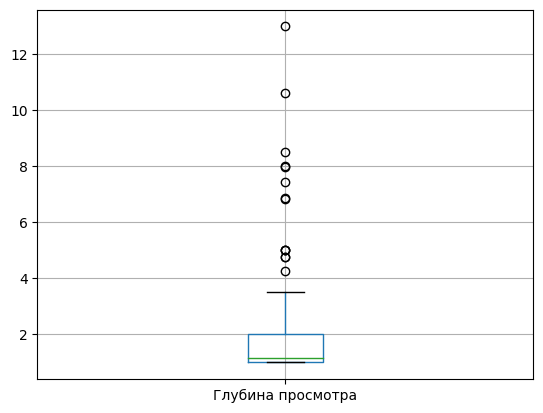

In [36]:
#Построим график "ящик с усами" чтобы посмотреть выбросы:
df.boxplot(column=['Глубина просмотра'])

Видим, что есть выбросы в Глубине просмотров свыше 4х страниц. Однако, в связи  стем, что данных не так много, будем стараться их сохранить.

In [37]:
np.percentile(df['Глубина просмотра'], [96])

array([5.])

In [38]:
df[df['Глубина просмотра'] > np.percentile(df['Глубина просмотра'], 96)]

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
24,Переходы по рекламе,яндекс.директ: не определено,2,2,0.000000,8.000000,0 days 00:01:00,0.000000,1.000000,0.000000,1.000000
36,Переходы по ссылкам на сайтах,webmaster.яндекс,58,6,0.137931,6.862069,0 days 00:05:25,0.929825,0.070175,0.000000,0.000000
38,Переходы по ссылкам на сайтах,metrika.яндекс,49,8,0.081633,7.428571,0 days 00:09:07,1.000000,0.000000,0.020408,0.069767
48,Переходы по ссылкам на сайтах,pitbel.bitrix24.ru,29,4,0.068966,7.965517,0 days 00:11:48,0.965517,0.034483,0.000000,0.153846
56,Переходы по ссылкам на сайтах,bryansktoday.ru,19,8,0.210526,6.842105,0 days 00:02:50,0.777778,0.222222,0.000000,0.153846
74,Переходы по ссылкам на сайтах,iloveadaptive.com,8,3,0.000000,10.625000,0 days 00:07:08,1.000000,0.000000,0.000000,0.142857
111,Переходы по ссылкам на сайтах,content.smadshop.md,2,1,0.000000,8.500000,0 days 00:11:08,1.000000,0.000000,0.000000,0.000000
157,Переходы по ссылкам на сайтах,freelancehunt.ru,1,1,0.000000,13.000000,0 days 00:01:04,1.000000,0.000000,0.000000,1.000000


Видим, что есть две строки, где за минуту было просмотрено 8 и 13 страниц, это наталкивает на мысль, что могут быть боты. Также еще есть технические посетители - с яндекс метрики и системы Битрикс.

In [39]:
#удаляем выбросы свыше 96 перцентиля
df = df.loc[df['Глубина просмотра'] <= np.percentile(df['Глубина просмотра'], 96)]

Проверим оставшиеся столбцы:

In [40]:
df['Доля мужчин'].describe()

count    224.000000
mean       0.515485
std        0.431958
min        0.000000
25%        0.000000
50%        0.571305
75%        1.000000
max        1.000000
Name: Доля мужчин, dtype: float64

In [41]:
df['Доля женщин'].describe()

count    224.000000
mean       0.283622
std        0.373897
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: Доля женщин, dtype: float64

In [42]:
df['Мобильность'].describe()

count    224.000000
mean       0.363559
std        0.434614
min        0.000000
25%        0.000000
50%        0.000000
75%        0.919552
max        1.000000
Name: Мобильность, dtype: float64

In [43]:
df['Блокировка рекламы'].describe()

count    224.000000
mean       0.144381
std        0.300498
min        0.000000
25%        0.000000
50%        0.000000
75%        0.125481
max        1.000000
Name: Блокировка рекламы, dtype: float64

Все ок.
По оставшимся столбцам аномальных значений не было обнаружено.

#### Перейдем к предобработке таблицы "Страницы_входа"

In [44]:
df_page.head()

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
1,https://superwebsite.ru/blog,https://superwebsite.ru/blog,102,94,0.215686,2.088235,0 days 00:02:23,0.590909,0.409091,0.617647
2,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,1048,952,0.083015,1.330153,0 days 00:01:01,0.910926,0.089074,0.728053
3,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,941,880,0.083953,1.356004,0 days 00:00:49,0.931133,0.068867,0.883103
4,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,782,684,0.057545,1.168798,0 days 00:01:05,0.522951,0.477049,0.750639
5,https://superwebsite.ru/blog/,https://superwebsite.ru/blog/sravnenie-kharakt...,670,631,0.102985,1.346269,0 days 00:01:13,0.704782,0.295218,0.826866


In [45]:
#Посмотрим наличие дубликатов в отдельных столбцах:

df_page['Страница входа'].duplicated().sum()

0

In [46]:
#Посмотрим количество уникальных значений в первом столбце таблицы:
df_page['Страница входа, ур. 2'].value_counts()

https://superwebsite.ru/product/                                               7811
https://superwebsite.ru/category/                                              4248
https://superwebsite.ru/blog/                                                   709
https://superwebsite.ru/index.php?                                               36
https://superwebsite.ru/brand/                                                   25
https://superwebsite.ru/blog                                                      1
https://superwebsite.ru/categories                                                1
https://superwebsite.ru/contact                                                   1
https://superwebsite.ru/o-nas                                                     1
https://superwebsite.ru/polzovatelskoe-soglashenie                                1
https://superwebsite.ru/referral/                                                 1
https://superwebsite.ru/top-15-luchshie-planshety-dlya-risovaniya-2020-goda 

In [47]:
#Приводим неявные дубликаты к единому значению:
df_page['Страница входа, ур. 2'] = df_page['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/blog', 'https://superwebsite.ru/blog/')
df_page['Страница входа, ур. 2'] = df_page['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/categories', 'https://superwebsite.ru/category/')
df_page['Страница входа, ур. 2'] = df_page['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/top-15-luchshie-planshety-dlya-risovaniya-2020-goda',
                                                                                'https://superwebsite.ru/blog/')

In [48]:
#Проверим выбросы:
df_page['Время на сайте'].describe()

count                        12836
mean     0 days 00:01:12.106653162
std      0 days 00:01:01.748005045
min                0 days 00:00:00
25%                0 days 00:00:23
50%                0 days 00:00:53
75%                0 days 00:01:42
max                0 days 00:10:23
Name: Время на сайте, dtype: object

In [49]:
#Посмотрим минимальное, максимальное и среднее значения времени:

print ('Минимальное время на сайте:', df_page['Время на сайте'].min())
print ('Максимальное время на сайте:', df_page['Время на сайте'].max())
print ('Среднее время на сайте:', df_page['Время на сайте'].mean())

Минимальное время на сайте: 0 days 00:00:00
Максимальное время на сайте: 0 days 00:10:23
Среднее время на сайте: 0 days 00:01:12.106653162


По времени на сайте есть и нулевое время, и максимальное -10 минут. В среднем проводят на сайте 1 мин 12 сек.

In [50]:
#Проверим максимальное время:
df_page[df_page['Время на сайте'] == '0 days 00:10:23']

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
3464,https://superwebsite.ru/category/,https://superwebsite.ru/category/avtomobilnaya...,18,17,0.277778,14.111111,0 days 00:10:23,0.846154,0.153846,0.666667


Замечаний к записи нет. Долго сидели, много смотрели мужчины про автомобильную акустику.

In [51]:
print ('Количество страниц входа с нулевым временем (т.е. с отказом):', len(df_page[df_page['Время на сайте'] == df_page['Время на сайте'].min()]))
print ('Это состоавляет ', round(len(df_page[df_page['Время на сайте'] == df_page['Время на сайте'].min()])/len(df_page)*100, 2) , '% от общего числа' )

Количество страниц входа с нулевым временем (т.е. с отказом): 1
Это состоавляет  0.01 % от общего числа


In [52]:
#Проверим остальные столбцы на аномальные значения:
df_page['Отказы'].describe()

count    12836.000000
mean         0.198834
std          0.139328
min          0.000000
25%          0.095238
50%          0.181818
75%          0.280175
max          0.937500
Name: Отказы, dtype: float64

Тут все ок.

In [53]:
#Проверяем столбец с "Глубиной просмотра"
df_page['Глубина просмотра'].describe()

count    12836.000000
mean         1.642231
std          0.752294
min          1.000000
25%          1.095238
50%          1.266667
75%          2.052632
max         14.111111
Name: Глубина просмотра, dtype: float64

Тут мы видим как раз максимальное значение в 14страниц, которое увидели выше с максимальным временем просмотра.
Можно будет удалить этот выброс.

In [54]:
#удаляем аномально высокое значение:
df_page.drop(labels = [3464],axis = 0,  inplace = True)

<Axes: >

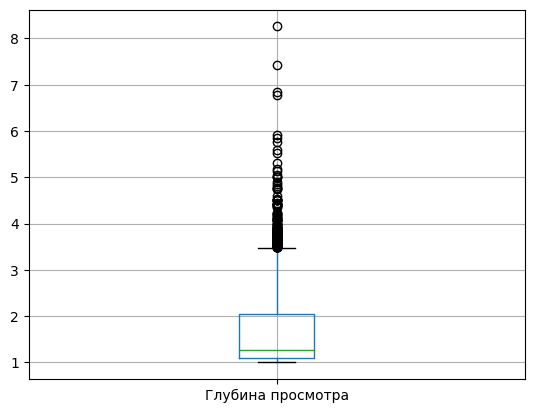

In [55]:
#Построим график "ящик с усами" чтобы посмотреть выбросы:
df_page.boxplot(column=['Глубина просмотра'])

График показывает, что выбросы начинаются с 3,5 страниц.

Посмотрим на значения перцентилей:

In [56]:
#Посмотрим 95 и 99 перцентиль
np.percentile(df['Глубина просмотра'], [95, 99])

array([3.        , 4.94888889])

Видим, что 99% значейний меньше 4.94 страниц просмотра.


In [57]:
#Смотрим данные с глубиной просмотра свыше 99 перцентиля:
df_page[df_page['Глубина просмотра'] > np.percentile(df_page['Глубина просмотра'], 99)]

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
638,https://superwebsite.ru/blog//,https://superwebsite.ru/blog/materinskie-platy...,13,13,0.230769,4.769231,0 days 00:03:14,0.900000,0.100000,0.461538
729,https://superwebsite.ru/brand/,https://superwebsite.ru/brand/inomata,16,16,0.000000,3.750000,0 days 00:03:59,0.153846,0.846154,1.000000
735,https://superwebsite.ru/brand/,https://superwebsite.ru/brand/step-puzzle,12,12,0.000000,4.083333,0 days 00:03:45,0.500000,0.500000,0.916667
755,https://superwebsite.ru/category/,https://superwebsite.ru/category/kolesnye-disk...,936,884,0.129274,5.173077,0 days 00:02:45,0.916555,0.083445,0.785256
765,https://superwebsite.ru/category/,https://superwebsite.ru/category/snoubordy-volkl,591,554,0.148900,3.883249,0 days 00:02:14,0.794931,0.205069,0.786802
...,...,...,...,...,...,...,...,...,...,...
4694,https://superwebsite.ru/category/,https://superwebsite.ru/category/polzunki-dlya...,13,13,0.000000,3.846154,0 days 00:03:34,0.000000,1.000000,1.000000
4834,https://superwebsite.ru/category/,https://superwebsite.ru/category/polotentsesus...,12,12,0.083333,4.500000,0 days 00:02:31,0.545455,0.454545,0.583333
11133,https://superwebsite.ru/product/,https://superwebsite.ru/product/mashinka-veld-...,14,14,0.000000,4.500000,0 days 00:08:17,0.769231,0.230769,0.857143
11313,https://superwebsite.ru/product/,https://superwebsite.ru/product/snoubord-omati...,14,11,0.428571,7.428571,0 days 00:09:25,0.923077,0.076923,0.500000


В принципе, можно оставить эти данные, потому что вопросов по ним не возникает. Пользователи находятся по несколько минут (от 2 до 9), просматривают несколько страниц, читают характеристики товаров, сравнивают, выбирают. На это нужно время. <br>
Признаков ботов или технических специалистов здесь не наблюдаем.

<br>
Переходим к следующим столбцам


In [58]:
#Проверяем параметр "Доля мужчин"
df_page['Доля мужчин'].describe()

count    12835.000000
mean         0.660432
std          0.258187
min          0.000000
25%          0.473684
50%          0.723404
75%          0.875000
max          1.000000
Name: Доля мужчин, dtype: float64

In [59]:
#Проверяем параметр "Доля женщин"
df_page['Доля женщин'].describe()

count    12835.000000
mean         0.339568
std          0.258187
min          0.000000
25%          0.125000
50%          0.276596
75%          0.526316
max          1.000000
Name: Доля женщин, dtype: float64

In [60]:
#Проверяем параметр "Мобильность"
df_page['Мобильность'].describe()

count    12835.000000
mean         0.673823
std          0.198503
min          0.000000
25%          0.550000
50%          0.684211
75%          0.803571
max          1.000000
Name: Мобильность, dtype: float64

Здесь все ок, аномальных значений не наблюдается.


### Переходим к проверке таблицы "Устройства"

In [61]:
#Смотрим количетсво уникальных значений в столбце 'Страница входа, ур. 2':
df_dev['Страница входа, ур. 2'].value_counts()

https://superwebsite.ru/product/                                               92
https://superwebsite.ru/category/                                              80
https://superwebsite.ru/blog/                                                  38
https://superwebsite.ru/brand/                                                 14
https://superwebsite.ru/index.php?                                             12
https://superwebsite.ru/categories                                              5
https://superwebsite.ru/referral/                                               3
https://superwebsite.ru/contact                                                 2
https://superwebsite.ru/o-nas                                                   1
https://yandexwebcache.net/yandbtm?                                             1
https://superwebsite-ru.translate.goog/product/                                 1
file:///C:/                                                                     1
https://_acme-ch

Здесь видим разделы сайта

In [62]:
#Приводим неявные дубликаты к единому значению:
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/categories', 'https://superwebsite.ru/category/')
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('https://superwebsite-ru.translate.goog/product/',
                                                                              'https://superwebsite.ru/product/')
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('https://_acme-challenge.superwebsite.ru/product/',
                                                                              'https://superwebsite.ru/product/')
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('file:///C:/',
                                                                              'https://superwebsite.ru/product/')
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/top-15-luchshie-planshety-dlya-risovaniya-2020-goda',
                                                                              'https://superwebsite.ru/blog/')
df_dev['Страница входа, ур. 2'] = df_dev['Страница входа, ур. 2'].str.replace('https://superwebsite.ru/12-luchshih-detskih-velosipedov-reyting-2020',
                                                                              'https://superwebsite.ru/blog/')


In [63]:
#Смотрим значения столбца "Тип устройства"
df_dev['Тип устройства'].value_counts()

Смартфоны    172
Планшеты      64
ПК            14
ТВ             4
Name: Тип устройства, dtype: int64

Видим, что есть 4 типа устройства, в основном заходят на сайт через смартфон, и даже есть 4 посетителя - через ТВ.

In [64]:
#Смотрим на производителей устройств:
df_dev['Производитель устройства'].value_counts()

Не определено     26
Apple             13
Xiaomi            12
Samsung           11
Huawei            10
                  ..
CUBE               1
PPTV               1
T-Mobile           1
General Mobile     1
Black Fox          1
Name: Производитель устройства, Length: 69, dtype: int64

Всего 69 производителей устройств. Однако есть 26 устройств с неопределенными  производителем. Четверка лидеров среди производителей: Apple, Xiaomi, Samsung, Huawei.

In [65]:
#Проверяем столбец "Отказы"
df_dev['Отказы'].describe()

count    254.000000
mean       0.171918
std        0.115417
min        0.000000
25%        0.100093
50%        0.149074
75%        0.223067
max        0.863636
Name: Отказы, dtype: float64

In [66]:
#Проверяем столбец "Блокировка рекламы"
df_dev['Блокировка рекламы'].describe()

count    254.000000
mean       0.081898
std        0.109856
min        0.000000
25%        0.000000
50%        0.057816
75%        0.111111
max        1.000000
Name: Блокировка рекламы, dtype: float64

Здесь все ок. Аномальных значений не наблюдаем.

In [67]:
#Проверяем столбец "Глубина просмотра"
df_dev['Глубина просмотра'].describe()

count    254.000000
mean       1.749836
std        0.656142
min        1.000000
25%        1.230769
50%        1.403352
75%        2.271212
max        4.428571
Name: Глубина просмотра, dtype: float64

<Axes: >

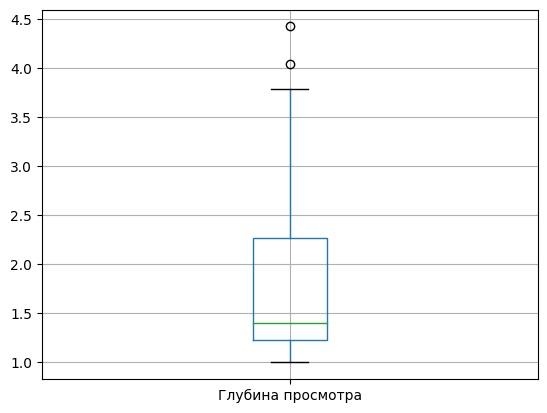

In [68]:
#Посмотрим на график ящик с усами по выбросам:
df_dev.boxplot(column=['Глубина просмотра'])

С глубиной просмотра - все ок. значительных выбросов не наблюдается.

In [69]:
#Посмотрим минимальное, максимальное и среднее значения времени:

print ('Минимальное время на сайте:', df_dev['Время на сайте'].min())
print ('Максимальное время на сайте:', df_dev['Время на сайте'].max())
print ('Среднее время на сайте:', df_dev['Время на сайте'].mean())

Минимальное время на сайте: 0 days 00:00:02
Максимальное время на сайте: 0 days 00:11:44
Среднее время на сайте: 0 days 00:01:12.988188976


In [70]:
#Посмотрим на максимальное значение времени:
df_dev[df_dev['Время на сайте'] == '0 days 00:11:44']

,"Страница входа, ур. 2",Тип устройства,Производитель устройства,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Блокировка рекламы
200,https://superwebsite.ru/category/,Планшеты,Oysters,21,16,0.095238,4.428571,0 days 00:11:44,0.0


In [71]:
#Удалим этот выброс:
df_dev.drop(labels = [200],axis = 0,  inplace = True)

In [72]:
#Проверим столбец еще раз:
df_dev['Время на сайте'].describe()

count                          253
mean     0 days 00:01:10.494071146
std      0 days 00:00:39.594434087
min                0 days 00:00:02
25%                0 days 00:00:46
50%                0 days 00:00:59
75%                0 days 00:01:37
max                0 days 00:05:10
Name: Время на сайте, dtype: object

Таким образом, мы закончили предобработку данных по таблицам.

## **Переходим к анализу данных:**

### Анализ таблицы "Источники":

In [73]:
#Делаем группировку по "Источнику трафика", смотрим по параметрам Посетители и Визиты:
t1_П_В = df.groupby('Источник трафика').agg({'Посетители': 'sum', 'Визиты':'sum'}) \
.reset_index().sort_values(by='Посетители', ascending = False)
t1_П_В['Доля посетителей, в %'] = (t1_П_В['Посетители']/t1_П_В['Посетители'].sum()*100).round(2)
t1_П_В['Доля визитов, в %'] = (t1_П_В['Визиты']/t1_П_В['Визиты'].sum()*100).round(2)
t1_П_В

,Источник трафика,Посетители,Визиты,"Доля посетителей, в %","Доля визитов, в %"
3,Переходы из поисковых систем,1149357,1320703,91.90,92.59
9,Прямые заходы,79068,82247,6.32,5.77
6,Переходы по рекламе,7636,7650,0.61,0.54
7,Переходы по ссылкам на сайтах,6627,7442,0.53,0.52
0,Внутренние переходы,5219,5484,0.42,0.38
5,Переходы из социальных сетей,2293,2340,0.18,0.16
1,Не определено,337,360,0.03,0.03
8,Переходы с сохранённых страниц,59,66,0.00,0.00
2,Переходы из мессенджеров,35,55,0.00,0.00
4,Переходы из рекомендательных систем,20,21,0.00,0.00


Видим, что по переходам из поисковых систем - приходят свыше 90% пользователей. Стоит изучить более детально этот источник трафика.

Более 5% посетителей приходят по прямым заходам, остальные источники занимают менее 1%.

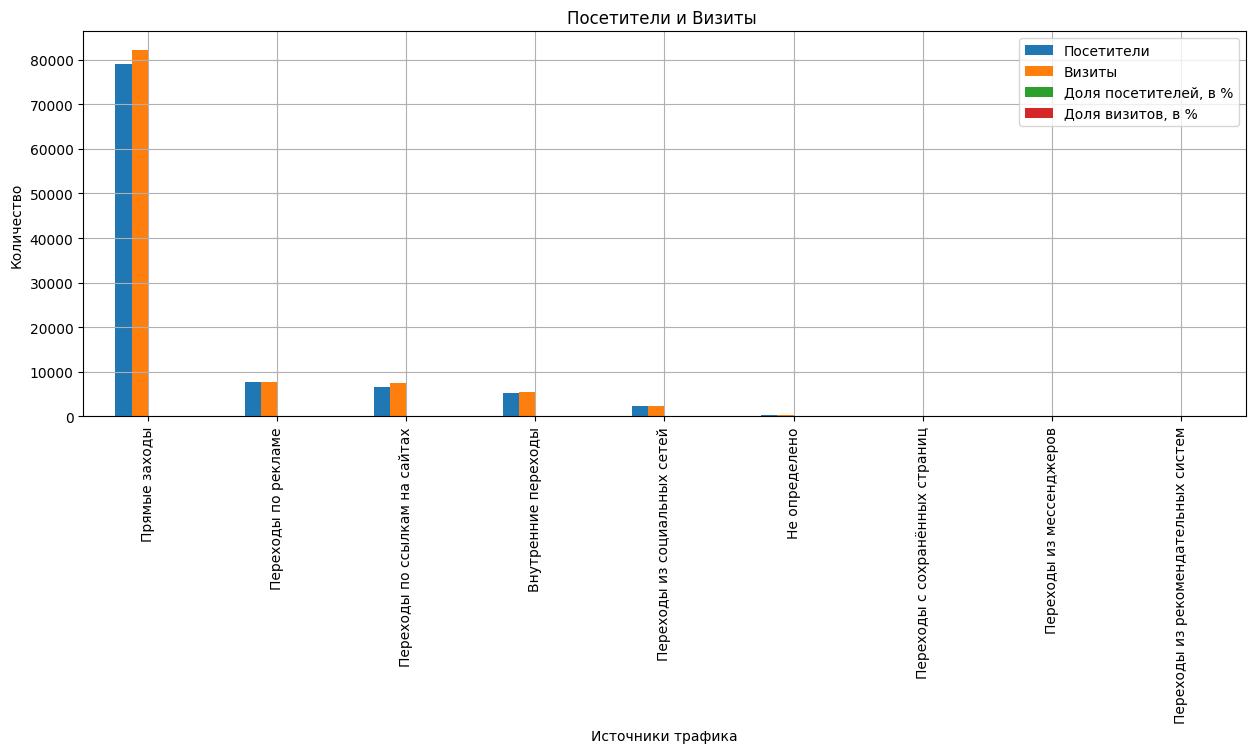

In [74]:
#Удалим строку с данными "переходы из поисковых систем", чтобы посмотреть на другие источники трафика на графике:
t1_П_В.drop(labels=[3], axis=0, inplace=True)

#Смотрим на графике
t1_П_В.plot.bar (figsize=(15,5), grid=True, title = 'Посетители и Визиты ', xlabel='Источники трафика', ylabel='Количество')
plt.xticks(np.arange(len(t1_П_В)), t1_П_В['Источник трафика'])
plt.show()

Видим, что больше всего посетителей из источникоа "Прямые заходы", а остальные источники имеют не больше 10000 пользователей

In [100]:
#Делаем группировку по "Источнику трафика", смотрим по остальным параметрам:

t1_ИТ = df.groupby('Источник трафика').agg({'Отказы': 'mean', 'Доля мужчин':'mean',
                                             'Доля женщин':'mean', 'Мобильность':'mean', 'Блокировка рекламы':'mean' }) \
.reset_index().sort_values(by='Источник трафика', ascending = False)
t1_ИТ

,Источник трафика,Отказы,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
9,Прямые заходы,0.198950,0.602910,0.397090,0.781123,0.106400
8,Переходы с сохранённых страниц,0.227273,0.871795,0.128205,0.000000,0.000000
7,Переходы по ссылкам на сайтах,0.332904,0.500786,0.283133,0.322893,0.144707
6,Переходы по рекламе,0.184641,0.597028,0.402972,0.672736,0.070350
5,Переходы из социальных сетей,0.121746,0.720728,0.279272,0.897168,0.263073
4,Переходы из рекомендательных систем,0.078947,0.187500,0.312500,0.750000,0.071429
3,Переходы из поисковых систем,0.209503,0.635771,0.264229,0.593065,0.111283
2,Переходы из мессенджеров,0.145455,0.742857,0.257143,0.890909,0.031250
1,Не определено,0.752778,0.794118,0.205882,0.530556,0.333333
0,Внутренние переходы,0.243618,0.549410,0.450590,0.819840,0.098750


Видим, что у "Прямых заходов" доля отказов - 0.19. Среди посетителей мужичн больше, чем женщин : 60% против 40%. Мобильность состовляет 78%, и блоикровка рекламы 10%. <br>
По остальным источникам трафика можно посмотреть в таблице. Но т.к. их доля незначительна, детально рассматривать не будем.

In [79]:
#Посмотрим детальнее на источник "Переходы из поисковых систем"
t_ПС = df[df['Источник трафика'] == 'Переходы из поисковых систем']
t_ПС

,Источник трафика,Источник трафика (детально),Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
4,Переходы из поисковых систем,яндекс,1274449,1106159,0.240500,1.426075,0 days 00:01:00,0.669129,0.330871,0.590250,0.105014
5,Переходы из поисковых систем,google,37420,34853,0.283618,1.406440,0 days 00:00:53,0.681943,0.318057,0.671085,0.126924
6,Переходы из поисковых систем,mail.ru,4280,4141,0.132944,1.443458,0 days 00:00:57,0.555105,0.444895,0.361449,0.205653
7,Переходы из поисковых систем,bing,1964,1962,0.028513,1.831976,0 days 00:01:38,0.542345,0.457655,0.928208,0.231579
8,Переходы из поисковых систем,rambler,1923,1620,0.259490,1.318253,0 days 00:00:56,0.718107,0.281893,0.158086,0.148936
9,Переходы из поисковых систем,duckduckgo,594,551,0.345118,1.319865,0 days 00:00:51,0.833935,0.166065,0.523569,0.223301
10,Переходы из поисковых систем,yahoo!,54,53,0.240741,1.425926,0 days 00:01:41,0.857143,0.142857,0.851852,0.071429
11,Переходы из поисковых систем,baidu,13,13,0.230769,1.000000,0 days 00:00:02,1.000000,0.000000,0.846154,0.000000
12,Переходы из поисковых систем,ecosia,3,2,0.333333,1.000000,0 days 00:00:56,0.000000,0.000000,1.000000,0.000000
13,Переходы из поисковых систем,skydns,3,3,0.000000,3.000000,0 days 00:02:08,0.500000,0.500000,0.000000,0.000000


Видим, что всего 10 поисковых систем, и сразу заметно, что больше всего пользователей от Яндекса. Посмотрим детальнее

In [80]:
#Группируем таблицу по поисковым системам и находим долю посетителей и визитов от общего числа:
t_ПС_g = t_ПС.groupby('Источник трафика (детально)').agg({'Посетители': 'sum', 'Визиты':'sum'}) \
.reset_index().sort_values(by='Посетители', ascending = False)
t_ПС_g['Доля посетителей, в%'] = (t_ПС_g['Посетители']/t_ПС_g['Посетители'].sum()*100).round(2)
t_ПС_g['Доля визитов, в%'] = (t_ПС_g['Визиты']/t_ПС_g['Визиты'].sum()*100).round(2)
t_ПС_g

,Источник трафика (детально),Посетители,Визиты,"Доля посетителей, в%","Доля визитов, в%"
9,яндекс,1106159,1274449,96.24,96.50
4,google,34853,37420,3.03,2.83
5,mail.ru,4141,4280,0.36,0.32
1,bing,1962,1964,0.17,0.15
6,rambler,1620,1923,0.14,0.15
2,duckduckgo,551,594,0.05,0.04
8,yahoo!,53,54,0.00,0.00
0,baidu,13,13,0.00,0.00
7,skydns,3,3,0.00,0.00
3,ecosia,2,3,0.00,0.00


На долю Яндекса приходится 96,2% посетителей. 3% на Google, и остальные системы занимают менее 1%.

In [81]:
#Смотрим остальные параметры :
t_ПС_g2 = t_ПС.groupby('Источник трафика (детально)').agg({'Посетители': 'sum', 'Отказы': 'mean','Глубина просмотра': 'mean', 'Время на сайте': 'mean', 'Доля мужчин':'mean',
                                                           'Доля женщин':'mean', 'Мобильность':'mean', 'Блокировка рекламы':'mean' }) \
.reset_index().sort_values(by='Посетители', ascending = False)
t_ПС_g2

,Источник трафика (детально),Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность,Блокировка рекламы
9,яндекс,1106159,0.240500,1.426075,0 days 00:01:00,0.669129,0.330871,0.590250,0.105014
4,google,34853,0.283618,1.406440,0 days 00:00:53,0.681943,0.318057,0.671085,0.126924
5,mail.ru,4141,0.132944,1.443458,0 days 00:00:57,0.555105,0.444895,0.361449,0.205653
1,bing,1962,0.028513,1.831976,0 days 00:01:38,0.542345,0.457655,0.928208,0.231579
6,rambler,1620,0.259490,1.318253,0 days 00:00:56,0.718107,0.281893,0.158086,0.148936
2,duckduckgo,551,0.345118,1.319865,0 days 00:00:51,0.833935,0.166065,0.523569,0.223301
8,yahoo!,53,0.240741,1.425926,0 days 00:01:41,0.857143,0.142857,0.851852,0.071429
0,baidu,13,0.230769,1.000000,0 days 00:00:02,1.000000,0.000000,0.846154,0.000000
7,skydns,3,0.000000,3.000000,0 days 00:02:08,0.500000,0.500000,0.000000,0.000000
3,ecosia,2,0.333333,1.000000,0 days 00:00:56,0.000000,0.000000,1.000000,0.000000


у системы Яндекс - отказы - 24%, Глубина просмотра - 1,42 страницы, среднее время на сайте - 1 минута, Мужин больше, чем женщин. Мобильность - почти 60%. Блокировка рекламы - 10%

У системы Google - отказов немного больше - 28%, глубина просмотра - 1,4 страницы. Время на сайте, немного меньше - 53 сек., Мобильность, чуть больше 67%, Блокировка рекламы - 12%.



In [82]:
#Посмотрим топ-10 детальных источников трафиков по посетителям (без привязки "Источник трафика" = "Переходы из поисковых систем"):
t2 = df.groupby('Источник трафика (детально)').agg({'Посетители': 'sum', 'Визиты':'sum'}) \
.reset_index().sort_values(by='Посетители', ascending = False).head(10)
t2['Доля посетителей, в%'] = (t2['Посетители']/t2['Посетители'].sum()*100).round(2)
t2['Доля визитов, в%'] = (t2['Визиты']/t2['Визиты'].sum()*100).round(2)
t2

,Источник трафика (детально),Посетители,Визиты,"Доля посетителей, в%","Доля визитов, в%"
192,яндекс,1110618,1279277,88.96,89.85
189,не определено,84684,88158,6.78,6.19
71,google,34878,37453,2.79,2.63
186,другая реклама: определено по меткам,7522,7527,0.60,0.53
105,mail.ru,4210,4356,0.34,0.31
31,bing,1962,1964,0.16,0.14
136,rambler,1801,2108,0.14,0.15
184,вконтакте,1201,1243,0.10,0.09
191,одноклассники,932,933,0.07,0.07
78,iframe-toloka.com,676,832,0.05,0.06


Здесь мы увидели, что есть неопределенные источники трафика, которые приводят 6,78% посетителей. Можно порекомендовать технической службе сделать здесь детализацию, чтобы не упускать ценных пользователей.

Яндекс - приносит почти 89% пользователей, на долю Google - приходится 2,8%, и остальные источники приводят по менее 1% пользователей.

### Анализ таблицы "Страницы_входа"

Задания:

1) Необходимо определить, на какой из разделов сайтов заходит больше всего пользователей: <br>
/category/
/product/
/blog/ <br>
(численное количество, процентное соотношение, показать диаграммой, добавить условие «переходы с мобильных устройств» и условие по гендеру муж/жен). <br>

2) Необходимо определить на каком из разделов больше всего задерживается пользователь по времени<br>

In [83]:
df_page.head()

,"Страница входа, ур. 2",Страница входа,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Доля мужчин,Доля женщин,Мобильность
1,https://superwebsite.ru/blog/,https://superwebsite.ru/blog,102,94,0.215686,2.088235,0 days 00:02:23,0.590909,0.409091,0.617647
2,https://superwebsite.ru/blog//,https://superwebsite.ru/blog/sravnenie-kharakt...,1048,952,0.083015,1.330153,0 days 00:01:01,0.910926,0.089074,0.728053
3,https://superwebsite.ru/blog//,https://superwebsite.ru/blog/sravnenie-kharakt...,941,880,0.083953,1.356004,0 days 00:00:49,0.931133,0.068867,0.883103
4,https://superwebsite.ru/blog//,https://superwebsite.ru/blog/sravnenie-kharakt...,782,684,0.057545,1.168798,0 days 00:01:05,0.522951,0.477049,0.750639
5,https://superwebsite.ru/blog//,https://superwebsite.ru/blog/sravnenie-kharakt...,670,631,0.102985,1.346269,0 days 00:01:13,0.704782,0.295218,0.826866


In [84]:
t_page = df_page.groupby('Страница входа, ур. 2').agg({'Посетители': 'sum', 'Визиты':'sum'}) \
.reset_index().sort_values(by='Посетители', ascending = False)
t_page['Доля посетителей, в %'] = (t_page['Посетители']/t_page['Посетители'].sum()*100).round(2)
t_page['Доля визитов, в %'] = (t_page['Визиты']/t_page['Визиты'].sum()*100).round(2)
t_page

,"Страница входа, ур. 2",Посетители,Визиты,"Доля посетителей, в %","Доля визитов, в %"
8,https://superwebsite.ru/product/,214088,226186,46.53,46.79
3,https://superwebsite.ru/category/,213834,222883,46.48,46.11
1,https://superwebsite.ru/blog//,29896,31952,6.50,6.61
2,https://superwebsite.ru/brand/,958,972,0.21,0.20
5,https://superwebsite.ru/index.php?,791,796,0.17,0.16
4,https://superwebsite.ru/contact,231,251,0.05,0.05
0,https://superwebsite.ru/blog/,124,132,0.03,0.03
6,https://superwebsite.ru/o-nas,105,161,0.02,0.03
9,https://superwebsite.ru/referral/,37,37,0.01,0.01
7,https://superwebsite.ru/polzovatelskoe-soglash...,14,14,0.00,0.00


Видим, что практически поровну приходится посетителей на раздел /product/ и /category/. - 46,5% .<br>
А в /blog/ - заходят всего 6,5%. <br>
На остальные старинцы входа заходят менеет 1% посетителей.

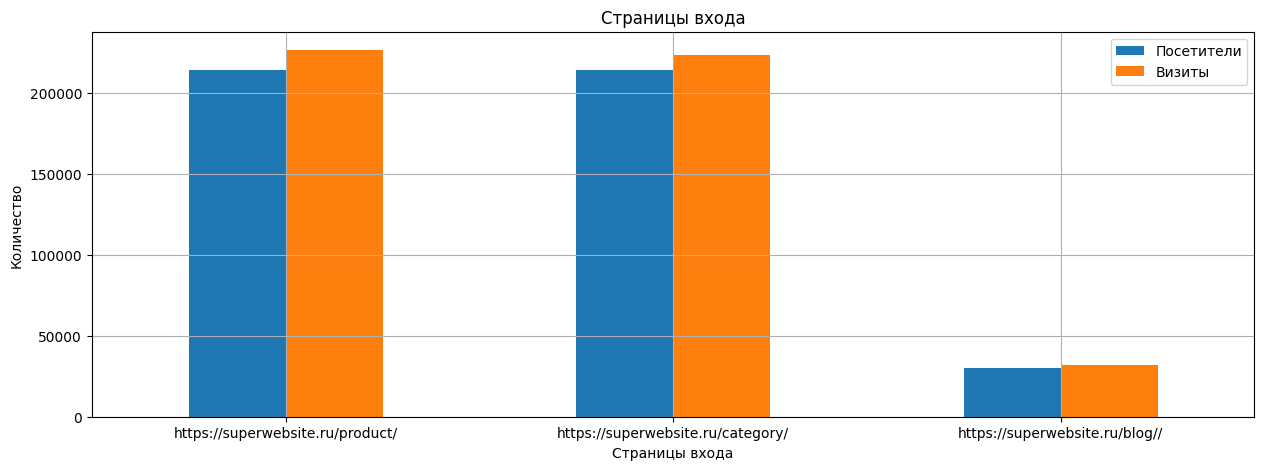

In [85]:
t_page = t_page.head(3)
#Смотрим на графике
t_page[['Страница входа, ур. 2',	'Посетители',	'Визиты']].plot.bar (figsize=(15,5), grid=True, title = 'Страницы входа', xlabel='Страницы входа', ylabel='Количество')
plt.xticks(np.arange(len(t_page)), t_page['Страница входа, ур. 2'])
plt.xticks(rotation=0)
plt.show()

In [101]:
#Делаем группировку по "Страницы входа", смотрим по остальным параметрам:

t1_page = df_page.groupby('Страница входа, ур. 2').agg({'Посетители': 'sum', 'Отказы': 'mean', 'Доля мужчин':'mean',
                                             'Доля женщин':'mean', 'Мобильность':'mean' }) \
.reset_index().sort_values(by='Посетители', ascending = False) #сортируем по количеству посетителей
t1_page.head(3) #выбираем три страницы с наибольшими посетителями
tabl_Z = t1_page.head(3) #выводим в отдельную таблицу, для удобства работы
#оставляем столбцы, кроме "Посетители"
tabl_Z = tabl_Z[['Страница входа, ур. 2',	'Отказы',	'Доля мужчин',	'Доля женщин',	'Мобильность']]
tabl_Z.reset_index(drop=True, inplace=True)
tabl_Z

,"Страница входа, ур. 2",Отказы,Доля мужчин,Доля женщин,Мобильность
0,https://superwebsite.ru/product/,0.231338,0.721346,0.278654,0.632062
1,https://superwebsite.ru/category/,0.153995,0.538063,0.461937,0.744479
2,https://superwebsite.ru/blog//,0.107529,0.734991,0.265009,0.694998


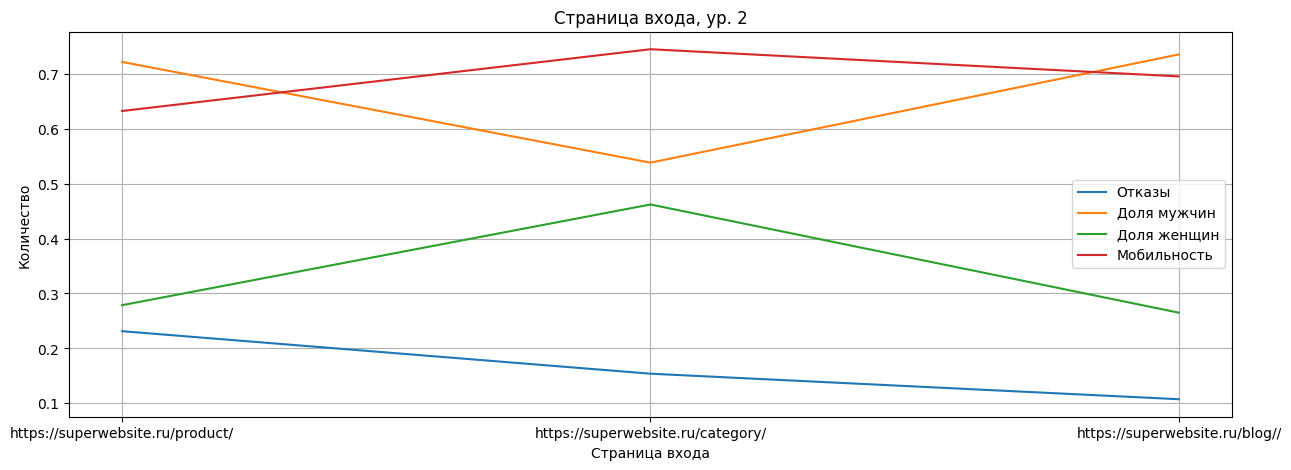

In [89]:
#Смотрим на графике показатели
tabl_Z.plot (figsize=(15,5), grid=True, title = 'Страница входа, ур. 2', xlabel='Страница входа', ylabel='Количество')
plt.xticks(np.arange(len(tabl_Z)), tabl_Z['Страница входа, ур. 2'])
#plt.xticks(rotation=90)
plt.show()

На графике видим, что переход с мобильных устройств - выше всего у раздела /category/ - 75%, <br>
параметр "Доля мужчин" - больше всего 74% у раздела /blog/ и 72% у раздела /product/,<br>
параметр "Доля женщин" - выше у раздела /category/ - 46%,<br>
параметр "Отказы" - выше у раздела /product/ - 23%. <br>

В целом, среди посетителей - больше всего мужчин, чем женщин. Высокая доля мобильности - свыше 63%.

#### 2) Необходимо определить на каком из разделов больше всего задерживается пользователь по времени

In [90]:
t_time = df_page.groupby('Страница входа, ур. 2').agg({'Посетители': 'sum', 'Время на сайте': 'mean'}).reset_index().sort_values(by='Посетители', ascending = False)
tabl_T = t_time.head(3)
tabl_T

,"Страница входа, ур. 2",Посетители,Время на сайте
8,https://superwebsite.ru/product/,214088,0 days 00:00:54.260273972
3,https://superwebsite.ru/category/,213834,0 days 00:01:47.620998116
1,https://superwebsite.ru/blog//,29896,0 days 00:00:53.709449929


Видим, что дольше всего посетители задерживаются на разделе /category/ = 1мин 47сек. И примерно одинаковое время проводят на разделах /prodact/ и /blog/ - 54 сек и 53 сек соответственно.

### Переходим к анализу таблицы "Устройства"

3) Выявить на каких устройствах чаще всего стоит блокировка рекламы

In [91]:
df_dev

,"Страница входа, ур. 2",Тип устройства,Производитель устройства,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте,Блокировка рекламы
1,https://superwebsite.ru/product/,ПК,Не определено,455714,384064,0.276816,1.198798,0 days 00:00:57,0.225879
2,https://superwebsite.ru/product/,Смартфоны,Xiaomi,155535,138216,0.250632,1.264828,0 days 00:00:50,0.071306
3,https://superwebsite.ru/product/,Смартфоны,Samsung,134537,120362,0.260085,1.222898,0 days 00:00:46,0.069544
4,https://superwebsite.ru/product/,Смартфоны,Apple,106390,98953,0.290958,1.162543,0 days 00:00:45,0.022162
5,https://superwebsite.ru/product/,Смартфоны,Huawei,85751,76302,0.238295,1.212091,0 days 00:00:45,0.063252
...,...,...,...,...,...,...,...,...,...
250,https://superwebsite.ru/category/,Смартфоны,T-Mobile,10,10,0.000000,2.600000,0 days 00:01:19,0.000000
251,https://superwebsite.ru/category/,Смартфоны,General Mobile,10,10,0.000000,1.700000,0 days 00:01:14,0.000000
252,https://superwebsite.ru/category/,Смартфоны,Realme,10,10,0.100000,3.400000,0 days 00:01:42,0.000000
253,https://superwebsite.ru/category/,Планшеты,Teclast,10,10,0.100000,2.800000,0 days 00:01:33,0.000000


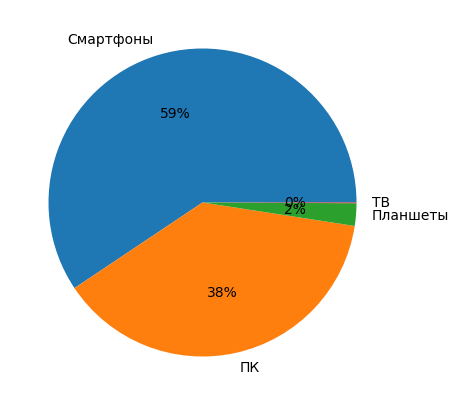

In [102]:
#Определи долю каждого типа устройства на круговой диаграмме:
t=df_dev.groupby(['Тип устройства']).agg({'Посетители':'sum'}).reset_index().sort_values(by='Посетители', ascending = False)
labels = t['Тип устройства'].to_list()
data = t['Посетители'].to_list()
plt.figure (figsize=(15,5))
plt.pie (data, labels=labels, autopct='%.0f%%')
plt.show()


Мы видим, что почти 60% посетителей заходят с смартфонов, 38% - заходят с ПК, 2,4% - с планшетов, и 0,1% - с ТВ. <br>


In [93]:
#Посмотрим на показатели по типу устройству:
dev_t = df_dev.groupby(['Тип устройства']).agg({'Посетители':'sum', 'Визиты':'sum', 'Блокировка рекламы':'mean', 'Отказы':'mean', 'Глубина просмотра':'mean',
                                                'Время на сайте':'mean'}).reset_index().sort_values(by='Посетители', ascending = False)
dev_t['Доля посетителей, в %'] = (dev_t['Посетители']/dev_t['Посетители'].sum()*100).round(1)
dev_t['Доля визитов, в %'] = (dev_t['Визиты']/dev_t['Визиты'].sum()*100).round(1)
dev_t

,Тип устройства,Посетители,Визиты,Блокировка рекламы,Отказы,Глубина просмотра,Время на сайте,"Доля посетителей, в %","Доля визитов, в %"
2,Смартфоны,748270,819996,0.070699,0.170458,1.789173,0 days 00:01:10.151162790,59.4,58.0
0,ПК,481099,559980,0.243656,0.313302,1.766286,0 days 00:01:04.285714285,38.2,39.6
1,Планшеты,29752,33773,0.054834,0.147033,1.609807,0 days 00:01:12.126984126,2.4,2.4
3,ТВ,956,1070,0.444079,0.150935,1.536559,0 days 00:01:21.250000,0.1,0.1


Блокировка рекламы - самый высокий процент у ПК - 24%, на смартфонах - 7%, на планшетах - 5%. <br>
Доля отказов выше у ПК - 31%. <br>
Глубина просмотра - примерно у всех одинаковая -1,6-1,7 страниц.<br>
среднее Время на сайте - самое быстрое у ПК - 1 мин 04 сек. на смартфонах и планшетах примерно одинаково - 1 мин 10 сек

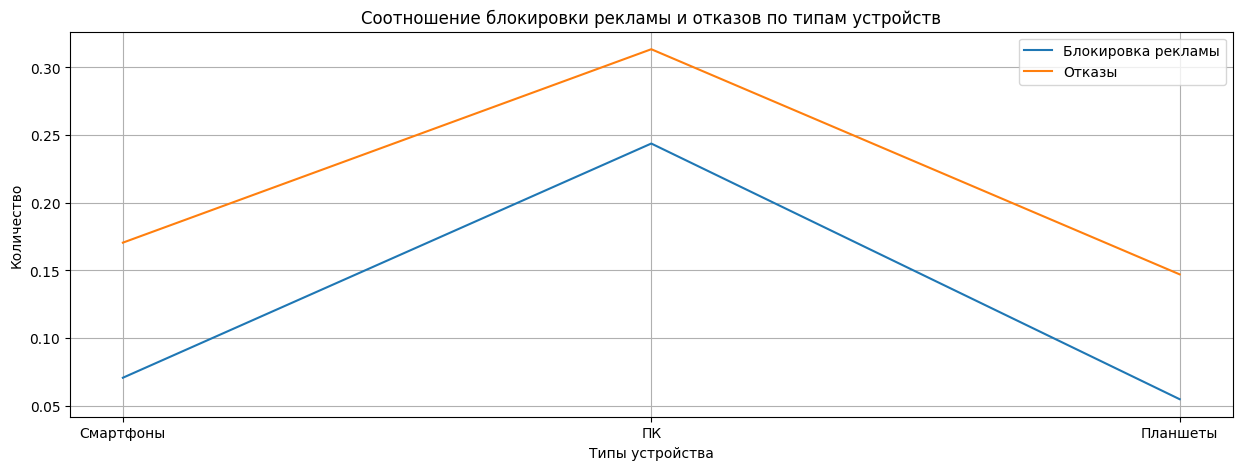

In [106]:
#сделаем отдельную табличку для вывода графика:
t_dev = dev_t[['Тип устройства', 'Блокировка рекламы',	'Отказы']]
t_dev.reset_index(drop=True, inplace=True)
t_dev = t_dev.head(3)
#выводим график
t_dev.plot (figsize=(15,5), grid=True, title = 'Соотношение блокировки рекламы и отказов по типам устройств', xlabel='Типы устройства', ylabel='Количество')
plt.xticks(np.arange(len(t_dev)), t_dev['Тип устройства'])
plt.show()

По ПК видим больше всего идут отказы и блокировка рекламы, затем на Смартфонах, и потом на Планшетах.

In [96]:
#Посмотрим параметры по производителям устройств
t4 = df_dev.groupby('Производитель устройства').agg({'Тип устройства':'count', 'Блокировка рекламы':'mean',
                                                'Отказы':'mean'}).reset_index().sort_values(by='Тип устройства', ascending=False)
t4.head(10)

,Производитель устройства,Тип устройства,Блокировка рекламы,Отказы
68,Не определено,26,0.214967,0.239366
5,Apple,13,0.013939,0.270151
64,Xiaomi,12,0.051667,0.239162
49,Samsung,11,0.060593,0.218264
27,Huawei,10,0.060006,0.245519
51,Sony,7,0.052819,0.154417
40,OPPO,6,0.047005,0.190215
34,Lenovo,6,0.056863,0.138240
31,LG Electronics,5,0.065711,0.119091
18,Explay,5,0.031235,0.105895


В топ-5 производителей по количетсву вошли Apple, Xiaomi, Samsung, Huawei. Но больше всего устройств с неопределенным производителем. <br>

Процент блокировки рекламы выше у Samsung и Huawei = 6%, потом Xiaomi = 5%, у Apple 1%. у устройств с неопределенным производителем - 21%.


In [97]:
#Посмотрим на типы устройств с неопределенным производителем:
df_dev[df_dev['Производитель устройства'] =='Не определено'].groupby('Тип устройства')['Производитель устройства'].count()

Тип устройства
ПК           14
Планшеты      3
Смартфоны     5
ТВ            4
Name: Производитель устройства, dtype: int64

Видим, что больше всего здесь находятся ПК (теперь понятно, почему высокая доля блокировки рекламы).

Посмотрим на каких разделах чаще срабатывает блокировка рекламы и отказы:<br>
( эти данные могут помочь определить на каком из разделов сайтов необходимо больше проработать рекламные блоки. мы можем передать в работу программистам для того, чтобы попробовать обходить блокировку)


In [99]:
#делаем группировку по разделам сайта и сортируем по блокировки рекламы:
t_str = df_dev.groupby('Страница входа, ур. 2').agg({'Блокировка рекламы':'mean', 'Отказы':'mean',	'Глубина просмотра':'mean',	'Время на сайте':'mean'})\
.reset_index().sort_values(by='Блокировка рекламы', ascending=False)
t_str

,"Страница входа, ур. 2",Блокировка рекламы,Отказы,Глубина просмотра,Время на сайте
5,https://superwebsite.ru/o-nas,0.370370,0.171875,1.640625,0 days 00:01:04
6,https://superwebsite.ru/polzovatelskoe-soglash...,0.250000,0.230769,3.538462,0 days 00:01:44
8,https://superwebsite.ru/referral/,0.222222,0.726768,1.355051,0 days 00:00:11.666666666
4,https://superwebsite.ru/index.php?,0.183112,0.193065,1.736641,0 days 00:01:09.583333333
3,https://superwebsite.ru/contact,0.125000,0.340549,1.792810,0 days 00:00:54
9,https://yandexwebcache.net/yandbtm?,0.125000,0.171429,1.571429,0 days 00:00:52
7,https://superwebsite.ru/product/,0.096961,0.197344,1.259341,0 days 00:00:51.084210526
2,https://superwebsite.ru/category/,0.070073,0.123898,2.443477,0 days 00:01:45.880952380
0,https://superwebsite.ru/blog/,0.038095,0.112564,1.257643,0 days 00:00:47.975000
1,https://superwebsite.ru/brand/,0.022971,0.297283,2.113839,0 days 00:01:09.357142857


Видим, что разделы, которые мы определели ранее в анализе, находятся в самом низу таблицы (при сортировке по убыванию блокировки рекламы):<br>
product/- 9.6% <br>
category/	- 7% <br>
blog/	- 3% <br>
Можно рекомендовать обработать рекламные блоки в разделе продуктов, и следующие разделы:<br>
Больше всего блокировка рекламы срабатывает в разделе "О нас" - 37%, "Пользовательское соглашение" -25%, referral/ - 22%

## Выводы

Мы закончили анализ показателей метрики для сайта витрины "superwebsite.ru".
На первом этапе мы загрузили таблицы и сохранили: <br>
в переменную df - таблицу "Источники", <br>
в переменную df_dev - таблицу "Устройства", <br>
в переменную df_page - таблицу "Страницы_входа".

На втором этапе мы сделали предобработку данных:
удалили первую строку в таблицу, с содержанием "итого и среднее" по всем данным. Проверили пропуски в таблицах, и таких не обнаружили.
Явных дубликатов тоже не нашли.

Проверили выбросы и аномальные значения по каждому столбцу в каждой таблице. Особое внимание уделили параметру "время на сайте".

В таблице "Источники", при среднем значении 1мин 13 сек, удалили выброс в 26 мин.  Обработали неявные дубликаты в столбце "Источник трафика (детально)", свели дубликаты повторяющихся поисковых систем. Также детально проверили параметр "Глубина просмотра" на аномальные значения: удалили выбросы свыше 96 перцентиля или свыше 5 страниц. По остальным столбцам не было выявлено замечаний.

В таблице "Страницы_входа" мы привели неявные дубликаты по разделам сайта. Детально проверили проведенное время на сайте, глубину просмотра (удалили выброс в 14 страниц).

В таблице "Устройства" мы привели неявные дебликаты по раздеам сайта, удалили выброс по времени на сайте в 11 минут, и детально посмотрели остальные параметры. <br>
<br>

На этапе **исследовательского анализа данных** была проведена следующая работа.

*  Анализ таблицы "Источники" дал следующие результаты:

Среди источников трафика абсолютное большинство посетителей приходят через "Переходы из поисковых систем" - 92% посетителей. Более 5% посетителей приходят по прямым заходам, остальные источники (переходы по рекламе, через соц сети) занимают менее 1% (или не больше 10000 пользователей).

У источника "Прямые заходы" доля отказов - 0.19. Среди посетителей мужичн больше, чем женщин : 60% против 40%. Мобильность состовляет 78%, и блоикровка рекламы 10%.

При детальном рассмотрении источника "переходы из поисковых систем" мы определили, что всего 10 поисковых систем и больше всего пользователей от Яндекса, на его долю приходится 96,2% посетителей. 3% на Google, и остальные системы (mail.ru, rambler, и др.)  занимают менее 1%.

  у системы Яндекс - отказы - 24%, Глубина просмотра - 1,42 страницы, среднее время на сайте - 1 минута, Мужин больше, чем женщин. Мобильность - почти 60%. Блокировка рекламы - 10%

  У системы Google - отказов немного больше - 28%, глубина просмотра - 1,4 страницы. Время на сайте, немного меньше - 53 сек., Мобильность, чуть больше 67%, Блокировка рекламы - 12%.

Также мы определили, что есть неопределенные источники трафика, которые приводят 6,78% посетителей. Можно порекомендовать технической службе сделать здесь детализацию, чтобы не упускать ценных пользователей.

* При анализе таблицы "Страницы_входа" мы ответили на основные вопросы задания.

1) Определили на какой из разделов сайтов (category/, product/, blog/) заходит больше всего пользователей:

практически поровну приходится посетителей на раздел /product/ и /category/. - 46,5%, в /blog/ - заходят всего 6,5%.<br>
На остальные старинцы входа заходят менеет 1% посетителей.
<br>

По параметрам: переход с мобильных устройств - выше всего у раздела /category/ - 75%,<br>
параметр "Доля мужчин" - больше всего 74% у раздела /blog/ и 72% у раздела /product/,<br>
параметр "Доля женщин" - выше у раздела /category/ - 46%,<br>
параметр "Отказы" - выше у раздела /product/ - 23%.<br>
В целом, среди посетителей - больше всего мужчин, чем женщин. Высокая доля мобильности - свыше 63%.
<br>
2) Определили на каком из разделов больше всего задерживается пользователь по времени:

дольше всего посетители задерживаются на разделе /category/ = 1мин 47сек. И примерно одинаковое время проводят на разделах /prodact/ и /blog/ - 54 сек и 53 сек соответственно.

*  При анализе таблицы "Устройства" мы ответили на вопрос:

3) На каких устройствах чаще всего стоит блокировка рекламы.

Для этого мы определили, что почти 60% посетителей заходят с смартфонов, 38% - заходят с ПК, 2,4% - с планшетов, и 0,1% - с ТВ.

Блокировка рекламы - самый высокий процент у ПК - 24%, на смартфонах - 7%, на планшетах - 5%.<br>
Доля отказов выше у ПК - 31%.<br>
Глубина просмотра - примерно у всех одинаковая -1,6-1,7 страниц.<br>
Среднее Время на сайте - самое быстрое у ПК - 1 мин 04 сек. на смартфонах и планшетах примерно одинаково - 1 мин 10 сек <br>

Также мы определили топ-5 производителей по количетсву устройств, туда вошли Apple, Xiaomi, Samsung, Huawei. Но больше всего устройств с неопределенным производителем.

Параметр блокировки рекламы выше у Samsung и Huawei = 6%, потом Xiaomi = 5%, у Apple 1%. у устройств с неопределенным производителем - 21%. Выявили, что в неопределенных устройствах больше всего находятся ПК.

4) Посмотрели на каких разделах чаще срабатывает блокировка рекламы и отказы:
( эти данные могут помочь определить на каком из разделов сайтов необходимо больше проработать рекламные блоки. мы можем передать в работу программистам для того, чтобы попробовать обходить блокировку)

Разделы, которые мы определели ранее в анализе, находятся в самом низу таблицы, при сортировке по убыванию блокировки рекламы:
product/- 9.6%
category/ - 7%
blog/ - 3%
Можно рекомендовать обработать рекламные блоки в разделе продуктов, и следующие разделы:
Больше всего блокировка рекламы срабатывает в разделе "О нас" - 37%, "Пользовательское соглашение" -25%, "referral/" - 22%.

В завершении, на основе данных анализа, можно предложить следующие рекомендации:
- среди источников трафика лидером по посетителям является поисковая система Яндекс (90% пользователей). Можно предложить действия на увеличение прихода пользователей с других поисковых платформ и других источников трафика.  <br>
 Например, делать камапнии на привлечение посетителей через социальные сети, проводить успешные рекламные кампании, сделать напоминалку на сайте, чтобы сохранить страницу, для быстрого перехода в дальнейшем, настроить рекомендательную систему сайта.  
- по блокировке рекламы и отказов - выше доля у пользователей с ПК, здесь можно предположить, что с компьютера чаще устанавливают плагины на блокировку рекламы, чем на смартфонах. Но все же, можно порекомендовать действия на обход программ, блокирующих рекламу именно на ПК. Касаемо смартфонов - делать акцент на андройд систему (производители Samsung и Huawei).
- также можно рекомендовать обработать рекламные блоки в разделе product/ (9.6% блокировки), и такие разделы как: "О нас" - 37%, "Пользовательское соглашение" -25%, "referral/" - 22%.
- т.к. сайт зарабатывает на показе рекламы, то важно, чтобы посетитель провел больше времени на странице сайта - поэтому можно предпринять действия, для увеличения среднего времени на разделах разделах /prodact/ и /blog/.
- в ходе анализа были выявлены неопределенные источники трафика (через них приходят 6% посетителей) и неопределенные производители устройств (с 21% блокировки рекламы) - можно предложить технической команде выявить, что туда входит, чтобы привлекать больше посетителей и успешнее обходить рекламные блоки
